In [ ]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt




In [2]:
directory = "./results/final_results3/"

test_files = glob.glob(directory + 'test*.csv')
train_files = glob.glob(directory + 'train*.csv')

pd_train = pd.DataFrame(columns = ["Episode", "Score", "Seed"])
pd_test = pd.DataFrame(columns = ["Episode", "Score", "Seed"])

for test_file in test_files:
    pd_test_file = pd.read_csv(test_file, delimiter = ";", names= ["Episode", "Score"])
    pd_test_file["Seed"] = test_file.split("/")[-1].split("_")[-1].split(".")[0]
    pd_test = pd.concat([pd_test, pd_test_file])
    pd_test.reset_index()
    
pd_test = pd_test.reset_index(drop=True)
pd_test_gb = pd_test.groupby("Episode")

pd_test_mean = pd_test_gb.mean()
pd_test_mean = pd_test_mean.reset_index()
pd_test_mean = pd_test_mean.rename(columns={'Episode':'Episode','Score' : 'MeanScore'})
pd_test_var = pd_test_gb.var()
pd_test_var = pd_test_var.reset_index()
pd_test_var = pd_test_var.rename(columns={'Episode':'Episode','Score' : 'VarScore'})

x_test = pd_test_mean["Episode"].values
mean_test = pd_test_mean["MeanScore"].values
std_test = np.sqrt(pd_test_var["VarScore"].values)



In [3]:
for train_file in train_files:
    pd_train_file = pd.read_csv(train_file, delimiter = ";", names= ["Episode", "Score"])
    pd_train_file["Seed"] = train_file.split("/")[-1].split("_")[-1].split(".")[0]
    pd_train = pd.concat([pd_train, pd_train_file])
    pd_train.reset_index()
    
pd_train = pd_train.reset_index(drop=True)
pd_train_gb = pd_train.groupby("Episode")

pd_train_mean = pd_train_gb.mean()
pd_train_mean = pd_train_mean.reset_index()
pd_train_mean = pd_train_mean.rename(columns={'Episode':'Episode','Score' : 'MeanScore'})
pd_train_var = pd_train_gb.var()
pd_train_var = pd_train_var.reset_index()
pd_train_var = pd_train_var.rename(columns={'Episode':'Episode','Score' : 'VarScore'})

x_train = pd_train_mean["Episode"].values
mean_train = pd_train_mean["MeanScore"].values
std_train = np.sqrt(pd_train_var["VarScore"].values)


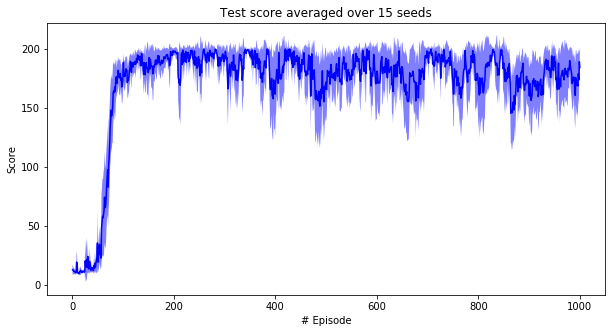

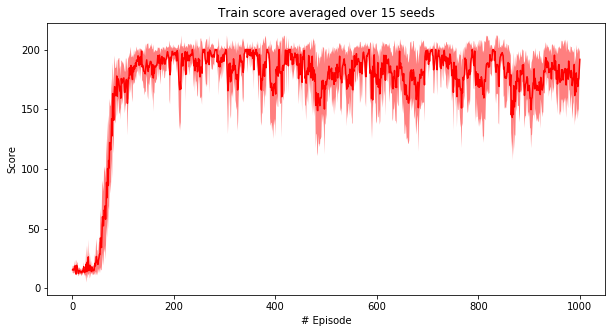

In [4]:
def custom_plot(x, y, z, xlabel, ylabel,title,color, figsize):
    fig, ax = plt.subplots(figsize=figsize)
    #ax = kwargs.pop('ax', plt.gca())
    base_line, = ax.plot(x, y, color)
    ax.fill_between(x, y - z/2, y + z/2, facecolor=base_line.get_color(), alpha=0.5)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

custom_plot(x_test, mean_test, std_test, "# Episode", "Score", "Test score averaged over {} seeds".format(len(test_files)),"b",(10,5))
custom_plot(x_train, mean_train, std_train, "# Episode", "Score", "Train score averaged over {} seeds".format(len(test_files)), "r", (10,5))

plt.show()